# Installment Payments Dataset


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
import pylab
pylab.rcParams['figure.figsize'] = (15, 10)

import seaborn as sns
import time
from scipy import stats

In [7]:
app_train = pd.read_csv('app_train_red.csv', index_col = 0)
prev_apps = pd.read_csv("previous_application.csv")
pmts = pd.read_csv("installments_payments.csv")

In [ ]:
prev_apps.sort_values(["SK_ID_PREV"]).head(20)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
38906,1000001,158271,Consumer loans,6404.310,58905.000,65124.0,0.000,58905.000,THURSDAY,8,...,Furniture,12.0,middle,POS industry with interest,365243.0,-268.0,62.0,-238.0,-233.0,0.0
73676,1000002,101962,Consumer loans,6264.000,39145.500,35230.5,3915.000,39145.500,SUNDAY,8,...,Consumer electronics,6.0,low_normal,POS household with interest,365243.0,-1600.0,-1450.0,-1510.0,-1501.0,0.0
1517084,1000003,252457,Consumer loans,4951.350,47056.275,52641.0,4.275,47056.275,SUNDAY,13,...,Consumer electronics,12.0,low_action,POS household without interest,365243.0,-94.0,236.0,365243.0,365243.0,1.0
1406334,1000004,260094,Consumer loans,3391.110,35144.370,30586.5,7032.870,35144.370,THURSDAY,9,...,Consumer electronics,10.0,low_normal,POS household without interest,365243.0,-862.0,-592.0,-682.0,-672.0,0.0
523289,1000005,176456,Consumer loans,14713.605,123486.075,120307.5,12349.575,123486.075,THURSDAY,13,...,Construction,10.0,middle,POS industry with interest,365243.0,-1688.0,-1418.0,-1418.0,-1415.0,0.0
1476878,1000006,427505,Consumer loans,10572.345,51417.000,51417.0,0.000,51417.000,WEDNESDAY,13,...,Connectivity,6.0,high,POS mobile with interest,NaN,NaN,NaN,NaN,NaN,NaN
1102061,1000007,256657,Consumer loans,11246.805,78570.000,62856.0,15714.000,78570.000,SUNDAY,13,...,Consumer electronics,6.0,low_normal,POS household with interest,365243.0,-123.0,27.0,365243.0,365243.0,0.0
368627,1000008,152059,Consumer loans,26331.660,249255.000,224325.0,24930.000,249255.000,MONDAY,14,...,Consumer electronics,10.0,middle,POS household with interest,365243.0,-1282.0,-1012.0,-1042.0,-1034.0,0.0
10842,1000009,343078,Consumer loans,9302.850,42705.000,45243.0,0.000,42705.000,SATURDAY,11,...,Consumer electronics,6.0,high,POS household with interest,365243.0,-457.0,-307.0,-307.0,-305.0,0.0
1636159,1000010,377567,Cash loans,74682.000,900000.000,900000.0,NaN,900000.000,THURSDAY,17,...,Consumer electronics,18.0,high,Cash X-Sell: high,365243.0,-558.0,-48.0,-258.0,-256.0,0.0


In [ ]:
pmts.sort_values(["SK_ID_PREV", "NUM_INSTALMENT_NUMBER"]).head(20)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
512588,1000001,158271,1.0,1,-268.0,-294.0,6404.310,6404.310
2159480,1000001,158271,2.0,2,-238.0,-244.0,62039.115,62039.115
1214732,1000002,101962,1.0,1,-1600.0,-1611.0,6264.000,6264.000
1631862,1000002,101962,1.0,2,-1570.0,-1575.0,6264.000,6264.000
3411021,1000002,101962,1.0,3,-1540.0,-1559.0,6264.000,6264.000
1006868,1000002,101962,2.0,4,-1510.0,-1554.0,18443.565,18443.565
6145031,1000003,252457,1.0,1,-94.0,-108.0,4951.350,4951.350
7054246,1000003,252457,1.0,2,-64.0,-81.0,4951.350,4951.350
4279518,1000003,252457,1.0,3,-34.0,-49.0,4951.350,4951.350
7126740,1000004,260094,1.0,1,-862.0,-881.0,3391.110,3391.110


In [ ]:
pmts_totals = pmts.groupby("SK_ID_PREV").AMT_INSTALMENT.agg(total = "sum").reset_index()
pmt_diff = pd.merge(prev_apps, pmts_totals, on = "SK_ID_PREV")[["SK_ID_PREV", "AMT_CREDIT", "total"]]

In [ ]:
pmt_diff["difference"] = pmt_diff.total - pmt_diff.AMT_CREDIT

In [ ]:
pmt_diff.head()

,SK_ID_PREV,AMT_CREDIT,total,difference
0,2030495,17145.0,17284.275,139.275
1,2802425,679671.0,125943.075,-553727.925
2,2523466,136444.5,135546.615,-897.885
3,2819243,470790.0,563133.375,92343.375
4,1383531,340573.5,419332.905,78759.405


<AxesSubplot:xlabel='difference', ylabel='Count'>

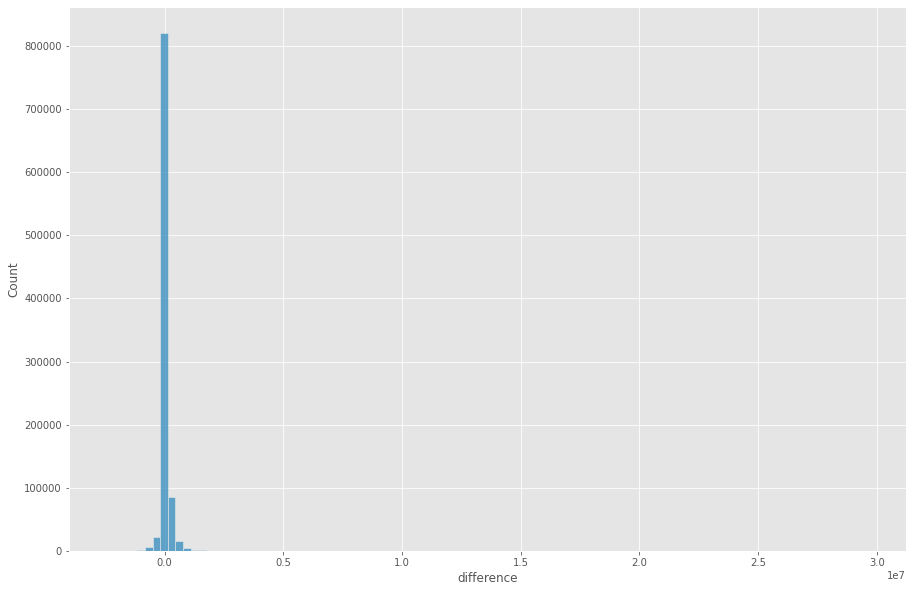

In [ ]:
sns.histplot(pmt_diff.difference, bins = 100)

In [ ]:
pmts.SK_ID_PREV.isin(prev_apps.SK_ID_PREV).sum() / len(pmts)

0.9080640107557285

In [ ]:
pmts.SK_ID_CURR.isin(prev_apps.SK_ID_CURR).sum() / len(pmts)

0.9937777651684063

In [ ]:
pmts[ ~pmts.SK_ID_PREV.isin(prev_apps.SK_ID_PREV) ].SK_ID_CURR.value_counts()

217360    279
212238    248
343828    224
335207    223
263929    222
         ... 
426850      1
213640      1
305578      1
218072      1
184663      1
Name: SK_ID_CURR, Length: 35227, dtype: int64

In [ ]:
# sns.scatterplot(install_pmts.AMT_INSTALMENT, install_pmts.AMT_PAYMENT)
# sns.lineplot([0, max(install_pmts.AMT_INSTALMENT)], [0, max(install_pmts.AMT_PAYMENT)])


In [ ]:
print(len(pmts[pmts.AMT_PAYMENT >= pmts.AMT_INSTALMENT]) / len(pmts) )
print(len(pmts[pmts.AMT_PAYMENT < pmts.AMT_INSTALMENT]) / len(pmts) )

NameError: name 'install_pmts' is not defined

In [ ]:
sns.histplot(pmts.AMT_PAYMENT)

In [ ]:
# sns.histplot(install_pmts.AMT_PAYMENT - install_pmts.AMT_INSTALMENT, bins = 100)

In [ ]:
# sns.scatterplot(install_pmts.AMT_INSTALMENT, install_pmts.AMT_PAYMENT - install_pmts.AMT_INSTALMENT)

In [ ]:
install_pmts[install_pmts.AMT_PAYMENT == 0].SK_ID_CURR.value_counts()

In [ ]:
missed_pmts = pd.DataFrame(install_pmts[install_pmts.AMT_PAYMENT == 0].SK_ID_CURR.value_counts()).reset_index()
missed_pmts.columns = ["SK_ID_CURR", "Pmts_Missed"]
missed_pmts

In [ ]:
missed_pmts[missed_pmts.Pmts_Missed > 1]

In [ ]:
under_paid = pd.DataFrame(install_pmts[install_pmts.AMT_PAYMENT < install_pmts.AMT_INSTALMENT].SK_ID_CURR.value_counts()).reset_index()
under_paid

In [5]:
pmts[pmts.SK_ID_PREV == 2802425]

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
1147425,2802425,108129,1.0,2,-104.0,-111.0,25188.615,25188.615
1992210,2802425,108129,1.0,5,-14.0,-24.0,25188.615,25188.615
2103478,2802425,108129,1.0,1,-134.0,-144.0,25188.615,25188.615
3310027,2802425,108129,1.0,4,-44.0,-55.0,25188.615,25188.615
3735308,2802425,108129,1.0,3,-74.0,-82.0,25188.615,25188.615


In [6]:
prev_apps[prev_apps.SK_ID_PREV == 2802425]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0


In [8]:
app_train[app_train.SK_ID_CURR == 108129]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
6979,108129,0,Revolving loans,F,N,N,0,90000.0,135000.0,6750.0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
prev_apps[(prev_apps.CNT_PAYMENT == 0) & (prev_apps.NAME_CONTRACT_STATUS == "Approved") ]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
17,1285768,142748,Revolving loans,9000.0,180000.0,180000.0,NaN,180000.0,FRIDAY,13,...,XNA,0.0,XNA,Card X-Sell,-277.0,-257.0,365243.0,365243.0,365243.0,0.0
34,1629736,255331,Revolving loans,10125.0,202500.0,202500.0,NaN,202500.0,SATURDAY,14,...,XNA,0.0,XNA,Card X-Sell,-265.0,-234.0,365243.0,365243.0,365243.0,0.0
49,1371540,200721,Revolving loans,11250.0,225000.0,225000.0,NaN,225000.0,FRIDAY,15,...,XNA,0.0,XNA,Card Street,365243.0,365243.0,365243.0,365243.0,-171.0,0.0
82,2709276,342991,Revolving loans,45000.0,900000.0,900000.0,NaN,900000.0,TUESDAY,13,...,XNA,0.0,XNA,Card X-Sell,-479.0,-435.0,365243.0,365243.0,365243.0,0.0
93,2522811,120854,Revolving loans,33750.0,0.0,675000.0,NaN,NaN,THURSDAY,18,...,XNA,0.0,XNA,Card X-Sell,-332.0,-297.0,365243.0,365243.0,365243.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669796,1161466,134972,Revolving loans,4500.0,90000.0,90000.0,NaN,90000.0,TUESDAY,12,...,XNA,0.0,XNA,Card X-Sell,365243.0,365243.0,365243.0,365243.0,-195.0,0.0
1669830,1292478,319374,Revolving loans,45000.0,0.0,900000.0,NaN,NaN,TUESDAY,16,...,XNA,0.0,XNA,Card X-Sell,-453.0,-409.0,365243.0,365243.0,365243.0,0.0
1669833,1544069,454213,Revolving loans,9000.0,180000.0,180000.0,NaN,180000.0,WEDNESDAY,9,...,XNA,0.0,XNA,Card X-Sell,-596.0,-557.0,365243.0,365243.0,365243.0,0.0
1669960,1731392,180860,Revolving loans,11250.0,0.0,225000.0,NaN,NaN,TUESDAY,17,...,XNA,0.0,XNA,Card X-Sell,-1083.0,-1055.0,365243.0,-354.0,365243.0,0.0


In [20]:
pmts[pmts.SK_ID_PREV == ID].sort_values("NUM_INSTALMENT_NUMBER").AMT_INSTALMENT.mean()

29491.003255813957

In [24]:
ID = 2709276
print("The loan given was for %f and the borrower ultimately paid out %f so far on the loan, paying an extra %f. \n The payments were supposed to be %f each while the average payemnt made so far is %f."
    %(prev_apps[prev_apps.SK_ID_PREV == ID].AMT_CREDIT, pmts[pmts.SK_ID_PREV == ID].sort_values("NUM_INSTALMENT_NUMBER").AMT_INSTALMENT.sum(), 
        pmts[pmts.SK_ID_PREV == ID].sort_values("NUM_INSTALMENT_NUMBER").AMT_INSTALMENT.sum() - prev_apps[prev_apps.SK_ID_PREV == ID].AMT_CREDIT,
        prev_apps[prev_apps.SK_ID_PREV == ID].AMT_ANNUITY, pmts[pmts.SK_ID_PREV == ID].AMT_INSTALMENT.mean())
    )

pmts[pmts.SK_ID_PREV == ID].sort_values("NUM_INSTALMENT_NUMBER")

The loan given was for 900000.000000 and the borrower ultimately paid out 1268113.140000 so far on the loan, paying an extra 368113.140000. 
 The payments were supposed to be 45000.000000 each while the average payemnt made so far is 29491.003256.


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
8569805,2709276,342991,0.0,1,-435.0,-445.0,2250.000,2250.000
9914087,2709276,342991,0.0,2,-445.0,-445.0,14064.570,14064.570
10007697,2709276,342991,0.0,3,-432.0,-432.0,465.750,465.750
9311899,2709276,342991,0.0,4,-404.0,-421.0,10667.115,10667.115
8670446,2709276,342991,0.0,5,-421.0,-421.0,2832.885,2832.885
9654501,2709276,342991,0.0,6,-398.0,-398.0,31500.000,31500.000
8201029,2709276,342991,0.0,7,-376.0,-385.0,13094.505,13094.505
8936323,2709276,342991,0.0,8,-385.0,-385.0,405.495,405.495
10543512,2709276,342991,0.0,9,-345.0,-357.0,15064.020,15064.020
10052261,2709276,342991,0.0,10,-357.0,-357.0,685.980,685.980


## Notes:
- Attempt to find if they have an ongoing previous loan
    - can do so by comparing the number of payments (if given) in the previous application dataset to the number of payments made so far in the installments payments dataframe. can use as an indicator for model if they have an ongoing previous loan. 
- Look into if there are any people who were approved for a previous loan with 0 for the CNT_PAYEMTN variable but have made payments

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9263f292-ea73-48e7-8892-f3d3ed1db03c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>